# **Task 3**
* Name: DEVANSHU GUPTA
* Reg.No.: 21BCE0597
* Email id: devanshu.gupta2021@vitstudent.ac.in
* Branch: CSE
* Campus: VIT Vellore
* Learning Track: AI & ML in collab. with Google (Applied Data Science)
* Batch: Evening (6pm - 8pm)
* Github Link: https://github.com/devanshu0602/Applied-Data-Science/tree/main/Task%203


## **Penguin Classification Analysis**

<br>

---

Problem Statement:
The Penguin Classification Analysis problem involves predicting the species of a penguin based on various physical characteristics. The dataset includes information about the body mass, culmen length, culmen depth, flipper length, and sex of different penguin species.

The problem is typically approached as a classification problem, where the target variable is the penguin species, and the features are the physical of the penguins.

Accurate classification of penguin species can also help researchers understand the effects of climate change and other environmental factors on penguin populations. The problem can also be useful for conservation efforts, as it can help identify and protect endangered penguin species.

---

**Attribute Information:**

* Species: penguin species (Chinstrap, Adélie, or Gentoo)
* Island: island name (Dream, Torgersen, or Biscoe) in Antarctica
* culmen_length_mm: culmen length (mm)
* culmen_depth_mm: culmen depth (mm)
* flipper_length_mm: flipper length (mm)
* body_mass_g: body mass (g)
* Sex: penguin sex

---

What is culmen?

The upper margin of the beak or bill is referred to as the culmen and the measurement is taken using calipers with one jaw at the tip of the upper mandible and the other at base of the skull or the first feathers depending on the standard chosen.

<br>
<br>

---
---

# Libraries required:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Task 3.1 -> Download the dataset: [Dataset](https://drive.google.com/file/d/1AvRp8hOK-O76WIFvPj_rk10fAZbt8nWH/view)

# Task 3.2 -> Load the dataset into the tool.

In [2]:
# Load the dataset
dataset = pd.read_csv('/content/penguins_size.csv')

# Make copy of real dataset to avoid changes on actual data
df = dataset.copy()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Task 3.3 -> Perform the below visualizations.

* Univariate
* Bi-variate
* Multi-variate

In [3]:
# Maka a copy of dataset to perform graph operations
df_graph = df.copy()

In [4]:
# Handling the NULL/missing values

# finding the missing values in non-categorical columns
non_categorical_cols = []
for col_name, col_data in df_graph.items():
    if (df_graph[col_name].dtype != 'object') and (df_graph[col_name].isnull().any()):
        non_categorical_cols.append(col_name)
# replacing the missing values non-categorical columns
for col_name in non_categorical_cols:
    median_val = df_graph[col_name].median()
    df_graph[[col_name]] = df_graph[[col_name]].fillna(median_val)
# replacing the missing values in categorical column
modal_val = "MALE"
df_graph['sex'] = df_graph['sex'].fillna(modal_val)

### --> Univariate

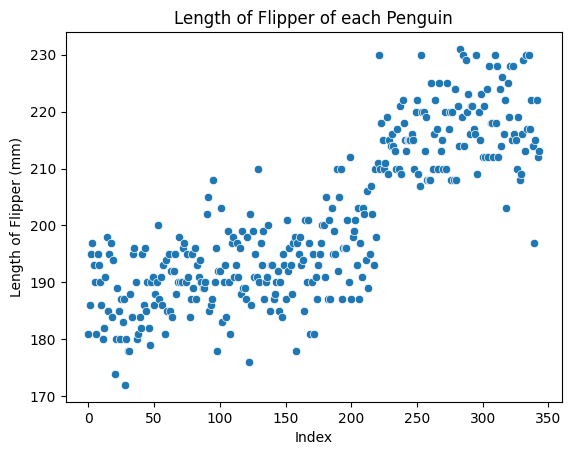

In [5]:
# Scatter plot for the lengths of flipper
sns.scatterplot(df_graph['flipper_length_mm'])
plt.xlabel('Index')
plt.ylabel('Length of Flipper (mm)')
plt.title('Length of Flipper of each Penguin')

plt.show()

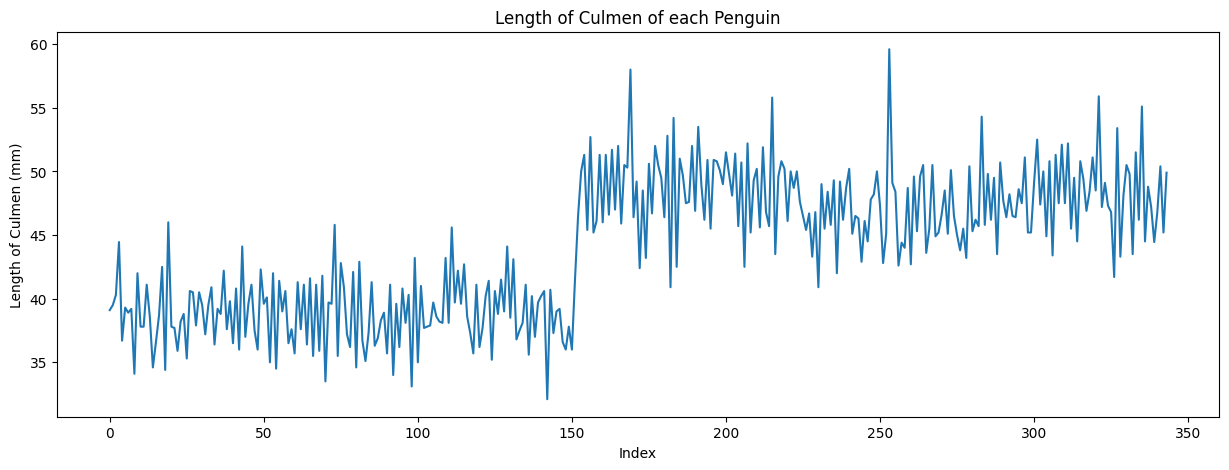

In [6]:
plt.figure(figsize = [15, 5])

# Lineplot for lengths of culmen
sns.lineplot(df_graph['culmen_length_mm'])
plt.xlabel('Index')
plt.ylabel('Length of Culmen (mm)')
plt.title('Length of Culmen of each Penguin')

plt.show()

### --> Bi - variate

<Figure size 800x800 with 0 Axes>

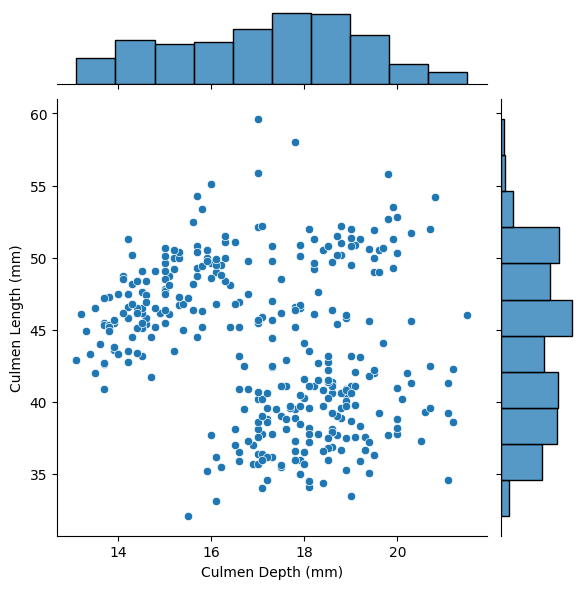

In [7]:
plt.figure(figsize = [8, 8])

# Joint plot for culmen depth and culmen length
sns.jointplot(
    data = df_graph,
    x = 'culmen_depth_mm',
    y = 'culmen_length_mm'
)
plt.xlabel('Culmen Depth (mm)')
plt.ylabel('Culmen Length (mm)')

plt.show()

### --> Multi - variate

In [8]:
# Create encoder object
encoder = LabelEncoder()

In [9]:
# Data encoding
df_graph['species'] = encoder.fit_transform(df_graph['species'])
df_graph['island'] = encoder.fit_transform(df_graph['island'])
df_graph['sex'] = encoder.fit_transform(df_graph['sex'])

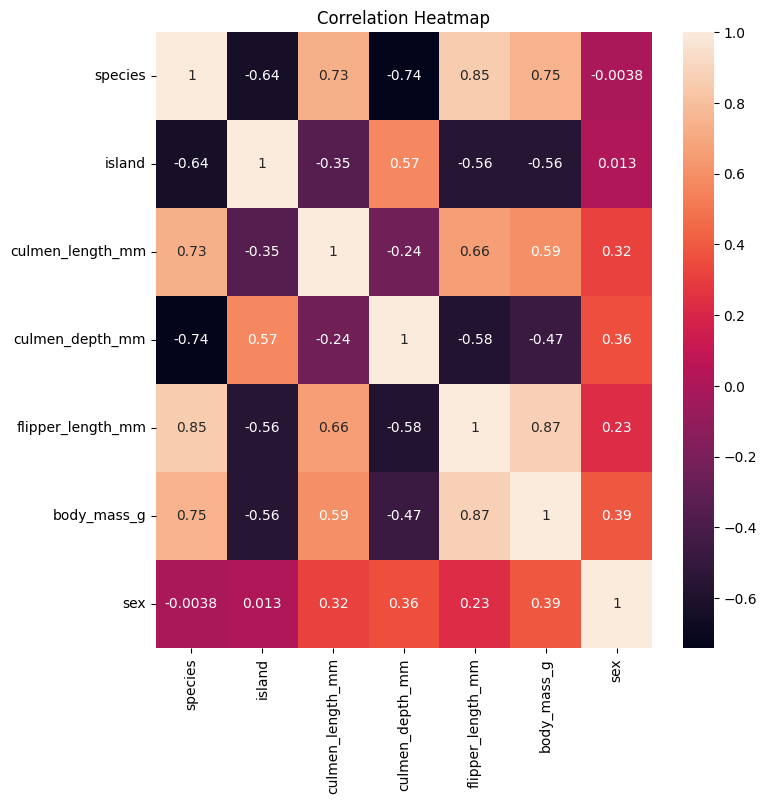

In [10]:
plt.figure(figsize = [8, 8])

# Heatmap of the correlation between data
sns.heatmap(
    df_graph.corr(),
    annot = True
)
plt.title('Correlation Heatmap')

plt.show()

# Task 3.4 -> Perform descriptive statistics on the dataset.

In [11]:
# Descriptive Analysis of the dataset
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Task 3.5 -> Check for missing values and deal with them.

In [12]:
# Checking the null values
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

### Missing values in non-categorical columns

In [13]:
# Finding non-categorical columns with null values
non_categorical_cols = []

for col_name, col_data in df.items():
    if (df[col_name].dtype != 'object') and (df[col_name].isnull().any()):
        non_categorical_cols.append(col_name)

In [14]:
# Handling missing values in non-categorical columns
# Replacing NaN values with median value

for col_name in non_categorical_cols:
    median_val = df[col_name].median()
    df[[col_name]] = df[[col_name]].fillna(median_val)

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,NaN
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


### Missing values in categorical column

In [15]:
# Finding the mode of categorical column
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [16]:
'''
We can see that the number of times 'MALE' has occured is more than 'FEMALE'.
Hence, 'MALE' will be the modal value.

'''

"\nWe can see that the number of times 'MALE' has occured is more than 'FEMALE'.\nHence, 'MALE' will be the modal value.\n\n"

In [17]:
# Modal value
modal_val = "MALE"

In [18]:
# Replacing the missing values with mode value
df['sex'] = df['sex'].fillna(modal_val)

In [19]:
# Re-checking for missing values
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [20]:
'''
We can see that there are no more null/missing values remaining.

'''

'\nWe can see that there are no more null/missing values remaining.\n\n'

# Task 3.6 -> Find the outliers and replace them outliers.

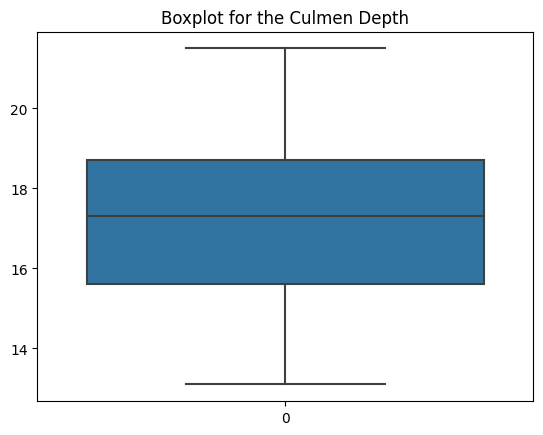

In [21]:
# Boxplot for the Culmen Depth
sns.boxplot(df_graph['culmen_depth_mm'])
plt.title('Boxplot for the Culmen Depth')

plt.show()

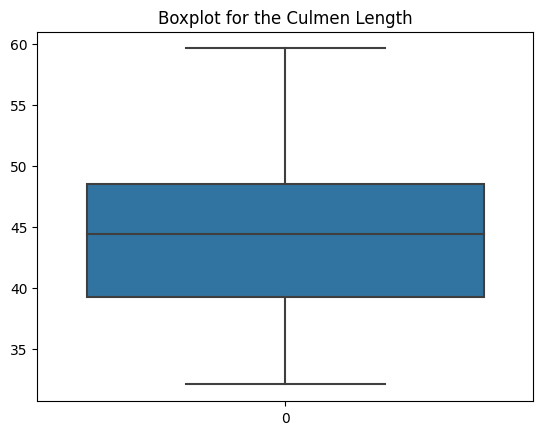

In [22]:
# Boxplot for the Culmen Length
sns.boxplot(df_graph['culmen_length_mm'])
plt.title('Boxplot for the Culmen Length')

plt.show()

In [23]:
'''
Hence, we can see and conclude that there are no outliers in the data.

'''

'\nHence, we can see and conclude that there are no outliers in the data.\n\n'

# Task 3.7 -> Check the correlation of independent variables with the target.

In [25]:
# Correlation between independent variables and dependent variable
df_graph.corr()['species'].sort_values(ascending = False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                 -0.003823
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

# Task 3.8 -> Check for categorical columns and perform encoding.

In [26]:
# Create encoder object
encoder = LabelEncoder()

In [27]:
# Encoding the categorical columns
for col_name, col_data in df.items():
    if df[col_name].dtype == 'object':
        # encoding
        df[col_name] = encoder.fit_transform(df[col_name])

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,2
1,0,2,39.50,17.4,186.0,3800.0,1
2,0,2,40.30,18.0,195.0,3250.0,1
3,0,2,44.45,17.3,197.0,4050.0,2
4,0,2,36.70,19.3,193.0,3450.0,1


# Task 3.9 -> Split the data into dependent and independent variables.

In [28]:
# Splitting of data into 'x' and 'y'

# DEPENDENT VARIABLE
y = df['species']

# INDEPENDENT VARIABLE
x = df.drop(
    columns = ['species'],
    axis = 1
)

# Print check the independent variable values
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,2
1,2,39.50,17.4,186.0,3800.0,1
2,2,40.30,18.0,195.0,3250.0,1
3,2,44.45,17.3,197.0,4050.0,2
4,2,36.70,19.3,193.0,3450.0,1


# Task 3.10 -> Scaling the data.

In [29]:
# Create a feature scaling object
scaler = MinMaxScaler()

In [30]:
# Scaling the independent variables
x_scaled = pd.DataFrame(
    scaler.fit_transform(x),
    columns = x.columns
)

x_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.5
2,1.0,0.298182,0.583333,0.389831,0.152778,0.5
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.5


# Task 3.11 -> Split the data into training and testing.

In [31]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled,
    y,
    test_size = 0.2,
    random_state = 0
)

# Task 3.12 -> Check the training and testing data shape.

In [32]:
x_train.shape

(275, 6)

In [33]:
x_test.shape

(69, 6)